In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
# Load the dataset
file_path = "p_values_adjusted.csv"

df = pd.read_csv(file_path)

In [11]:
# Display basic info
display(df.head())
print(df.describe())

,raw_p_values,bonferroni_adjusted_p_values,BH_adjusted_p_values
0,3.885579e-49,1.676278e-44,1.970700e-48
1,5.748096e-40,2.479786e-35,2.037957e-39
2,2.677411e-66,1.155062e-61,2.773923e-65
3,7.944009e-44,3.427125e-39,3.259273e-43
4,1.264738e-22,5.456205e-18,2.618643e-22


       raw_p_values  bonferroni_adjusted_p_values  BH_adjusted_p_values
count  4.314100e+04                  4.314100e+04          4.314100e+04
mean   4.439623e-02                  2.312375e-01          4.579615e-02
std    1.599701e-01                  4.147296e-01          1.628070e-01
min    4.421718e-75                  1.907573e-70          7.422465e-74
25%    7.847719e-43                  3.385585e-38          3.087628e-42
50%    7.591015e-21                  3.274840e-16          1.498371e-20
75%    1.599344e-06                  6.899731e-02          2.124432e-06
max    1.000000e+00                  1.000000e+00          1.000000e+00


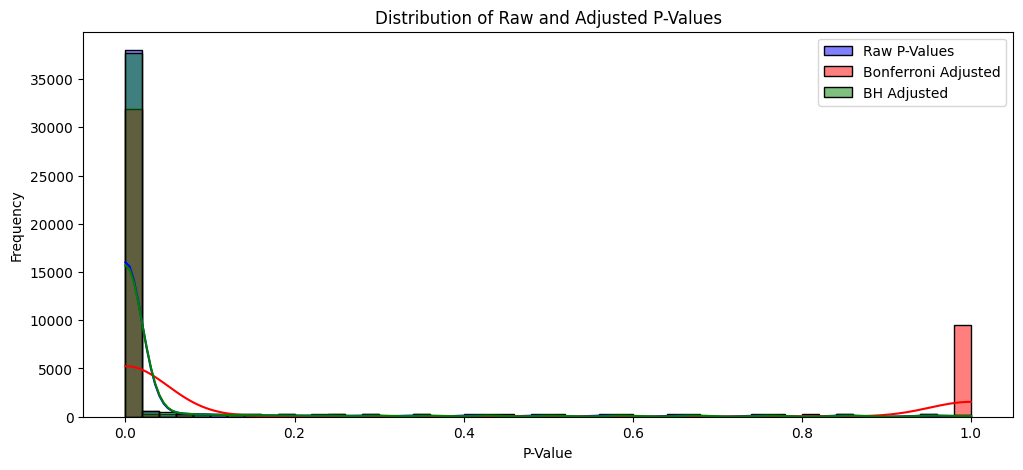

In [5]:
# Histogram of p-values
plt.figure(figsize=(12, 5))
sns.histplot(df["raw_p_values"], bins=50, kde=True, color='blue', label='Raw P-Values')
sns.histplot(df["bonferroni_adjusted_p_values"], bins=50, kde=True, color='red', label='Bonferroni Adjusted')
sns.histplot(df["BH_adjusted_p_values"], bins=50, kde=True, color='green', label='BH Adjusted')
plt.legend()
plt.xlabel("P-Value")
plt.ylabel("Frequency")
plt.title("Distribution of Raw and Adjusted P-Values")
plt.show()

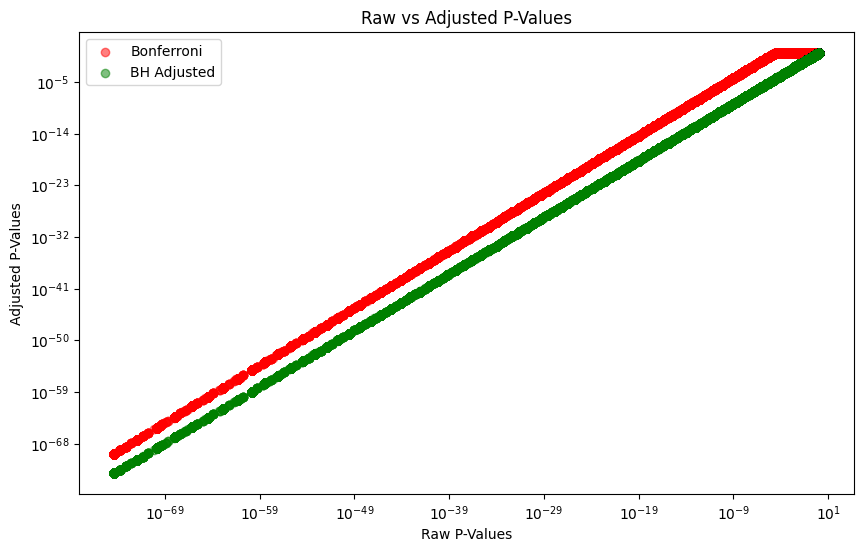

In [6]:
# Scatter Plot: Raw vs Adjusted P-Values
plt.figure(figsize=(10, 6))
plt.scatter(df["raw_p_values"], df["bonferroni_adjusted_p_values"], alpha=0.5, color='red', label='Bonferroni')
plt.scatter(df["raw_p_values"], df["BH_adjusted_p_values"], alpha=0.5, color='green', label='BH Adjusted')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Raw P-Values")
plt.ylabel("Adjusted P-Values")
plt.title("Raw vs Adjusted P-Values")
plt.legend()
plt.show()

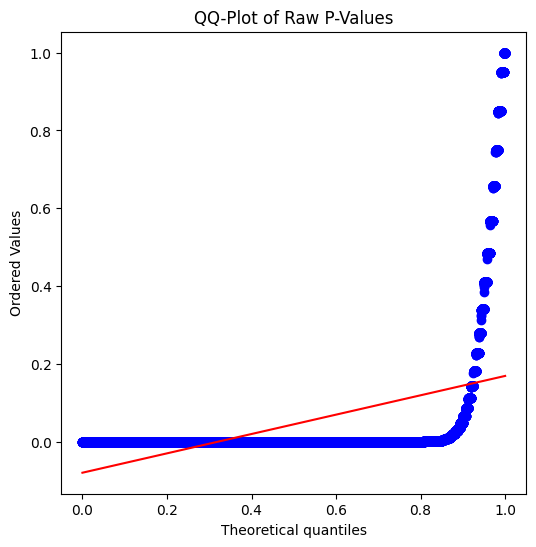

In [7]:
# QQ-Plot to Check P-Value Distribution
plt.figure(figsize=(6,6))
stats.probplot(df["raw_p_values"], dist="uniform", plot=plt)
plt.title("QQ-Plot of Raw P-Values")
plt.show()

In [9]:
# Counting significant SNPs
alpha = 0.05
significant_raw = (df["raw_p_values"] < alpha).sum()
significant_bonferroni = (df["bonferroni_adjusted_p_values"] < alpha).sum()
significant_bh = (df["BH_adjusted_p_values"] < alpha).sum()

print(f"Significant SNPs before correction: {significant_raw}")
print(f"Significant SNPs after Bonferroni correction: {significant_bonferroni}")
print(f"Significant SNPs after Benjamini-Hochberg correction: {significant_bh}")

Significant SNPs before correction: 38805
Significant SNPs after Bonferroni correction: 32196
Significant SNPs after Benjamini-Hochberg correction: 38562


In [13]:
# Apply Stricter Filtering Thresholds
strict_threshold = 1e-5
df_strict = df[df["raw_p_values"] < strict_threshold]
print(f"SNPs with p < {strict_threshold}: {len(df_strict)}")

SNPs with p < 1e-05: 33126
